# **CARGA DE TRAIN Y TEST**

In [6]:
import numpy as np
import pandas as pd

In [7]:
x_train=pd.read_excel('02-x_train-IEMOCAP-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('02-x_test-IEMOCAP-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('02-y_train-IEMOCAP-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('02-y_test-IEMOCAP-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)


# **NORMALIZACION DE CARACTERISTICAS**

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [9]:
x_train_std

array([[ 1.09420576,  1.07768252, -1.27470035, ...,  0.90660226,
        -1.30714187,  1.09551347],
       [-0.1087016 , -0.8929417 ,  0.92306219, ...,  1.11545543,
        -1.50854277,  0.56776234],
       [-0.15407878,  1.0758596 , -0.99772786, ..., -0.88915251,
        -1.79081519, -0.32512847],
       ...,
       [ 0.56321129, -0.06691836,  0.13836599, ..., -0.55500201,
        -2.45218571,  0.36226748],
       [-0.89407893, -1.10063144,  0.42990194, ..., -0.78111048,
         0.20799316, -0.73926937],
       [ 0.13191064,  0.66862246, -1.41449026, ...,  0.16360875,
        -1.38190807,  1.32257939]])

# **MODELO DE MARCHINE LEARNING**

In [10]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13312     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 83,236
Trainable params: 83,236
Non-trainable params: 0
_________________________________________________________________


In [11]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_train)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=1000)#1000
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I
#1000 70
#1000 67
#1250 69
#1300 66
#995 68

Epoch 1/1000
57/57 [==============================] - 1s 3ms/step - loss: 0.9131 - accuracy: 0.6234
Epoch 2/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.7793 - accuracy: 0.6656
Epoch 3/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.7277 - accuracy: 0.6957
Epoch 4/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.7023
Epoch 5/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.7286
Epoch 6/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.6381 - accuracy: 0.7385
Epoch 7/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.7527
Epoch 8/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.5899 - accuracy: 0.7544
Epoch 9/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.7593
Epoch 10/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.7730

array([1, 2, 2, 2, 2, 2, 3, 2, 1, 0, 3, 3, 2, 3, 0, 3, 2, 1, 3, 1, 2, 2,
       2, 3, 3, 0, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 0, 3, 1,
       3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 2, 3, 0, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 2, 0, 0, 3, 0, 2, 3,
       2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 0, 3, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 3, 1, 2, 0, 3, 3, 0, 2, 2, 2, 1, 3, 0, 1,
       0, 3, 3, 2, 2, 3, 2, 3, 1, 0, 3, 3, 2, 2, 3, 2, 0, 3, 0, 2, 3, 1,
       2, 2, 0, 1, 2, 2, 0, 0, 3, 2, 0, 0, 3, 3, 3, 2, 2, 2, 2, 1, 0, 3,
       2, 2, 1, 0, 2, 2, 2, 2, 3, 2, 3, 2, 1, 3, 2, 1, 3, 3, 2, 3, 2, 1,
       0, 1, 1, 3, 3, 2, 0, 2, 2, 3, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 3,
       3, 2, 0, 3, 2, 3, 1, 2, 3, 3, 1, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2,
       2, 2, 3, 3, 3, 2, 1, 2, 0, 2, 3, 3, 2, 2, 2,

# **EVALUACION**

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.53      0.58      0.56        53
           1       0.32      0.34      0.33        56
           2       0.74      0.68      0.71       238
           3       0.68      0.74      0.71       109

    accuracy                           0.64       456
   macro avg       0.57      0.59      0.58       456
weighted avg       0.65      0.64      0.65       456



In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.53      0.58      0.56        53
           1       0.32      0.34      0.33        56
           2       0.74      0.68      0.71       238
           3       0.68      0.74      0.71       109

    accuracy                           0.64       456
   macro avg       0.57      0.59      0.58       456
weighted avg       0.65      0.64      0.65       456

Matriz de confusión, sin normalización
[[ 31  10  11   1]
 [ 10  19  21   6]
 [ 16  28 162  32]
 [  1   3  24  81]]


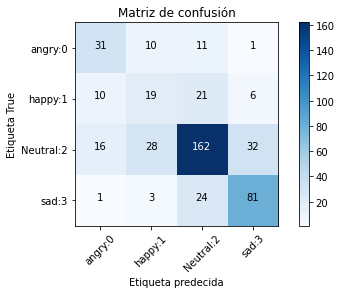

In [14]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')